In [3]:
import os
import torch
import pandas as pd
import backtest as bt
from utils import *
from tqdm import tqdm
from factorVAE.factor_VAE import FactorVAE
os.environ['KMP_DUPLICATE_LIB_OK'] = "True"

## Part 1 - Training the model

In [4]:
# hyperparameters
batch_size = 32
feature_size = 143
stock_size = 100
latent_size = 64
factor_size = 32
time_span = 20
gru_input_size = 64
hidden_size = 64
lr = 1e-4
epochs = 20
device = try_gpu()
# model
factor_VAE = FactorVAE(
    characteristic_size=feature_size,
    stock_size=stock_size,
    latent_size=latent_size,
    factor_size=factor_size,
    time_span=time_span,
    gru_input_size=gru_input_size,
    hidden_size=hidden_size
).to(device)

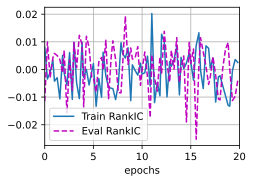

In [7]:
# model training
features_train, returns_train = get_dataset("train")
features_eval,  returns_eval  = get_dataset("eval")
features_test,  returns_test  = get_dataset("test")
train_dl = get_dataloader_factorVAE(features_train, returns_train, device, batch_size)
optimizer = torch.optim.Adam(factor_VAE.parameters(), lr=lr)
factor_VAE = train_factorVAE(train_dl, factor_VAE, optimizer, epochs, features_train, returns_train, features_eval, returns_eval, repeat=5)

## Part 2 - Fetch the weight and backtest

### 1. Training backtest

100%|██████████| 1132/1132 [01:48<00:00, 10.42it/s]


backtest from 2010-05-05 to 2010-05-06 has been done
backtest from 2010-05-06 to 2010-05-07 has been done
backtest from 2010-05-07 to 2010-05-10 has been done
backtest from 2010-05-10 to 2010-05-11 has been done
backtest from 2010-05-11 to 2010-05-12 has been done
backtest from 2010-05-12 to 2010-05-13 has been done
backtest from 2010-05-13 to 2010-05-14 has been done
backtest from 2010-05-14 to 2010-05-17 has been done
backtest from 2010-05-17 to 2010-05-18 has been done
backtest from 2010-05-18 to 2010-05-19 has been done
backtest from 2010-05-19 to 2010-05-20 has been done
backtest from 2010-05-20 to 2010-05-21 has been done
backtest from 2010-05-21 to 2010-05-24 has been done
backtest from 2010-05-24 to 2010-05-25 has been done
backtest from 2010-05-25 to 2010-05-26 has been done
backtest from 2010-05-26 to 2010-05-27 has been done
backtest from 2010-05-27 to 2010-05-28 has been done
backtest from 2010-05-28 to 2010-05-31 has been done
backtest from 2010-05-31 to 2010-06-01 has bee

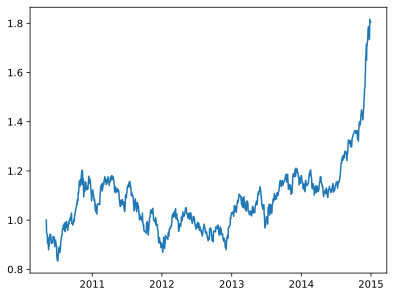

In [8]:
# get training weight
weights_train = get_weights(factor_VAE, features_train, type="train", repeat=5)
weights_train.to_csv("../backtest/FactorVAE/train/weights_train.csv")
# params for backtest
param = dict()
param["init_value"] = 1
param["start_date"] = "2010-05-05"
param["end_date"] = "2014-12-30" 
param["threshold"] = 1
param["days_back"] = 20
param["fee"] = True
param["stock_price"] = "../backtest/close.csv"  # close data
param["stock_weight"] = "../backtest/FactorVAE/train/weights.csv" # weight of strategy
param["result_savepath"] = "../backtest/FactorVAE/train/result.xlsx" # result save path
# backtest
backtest_result_train = bt.backtest(param)

### 2. Evaluation backtest

100%|██████████| 468/468 [00:43<00:00, 10.68it/s]


backtest from 2015-02-02 to 2015-02-03 has been done
backtest from 2015-02-03 to 2015-02-04 has been done
backtest from 2015-02-04 to 2015-02-05 has been done
backtest from 2015-02-05 to 2015-02-06 has been done
backtest from 2015-02-06 to 2015-02-09 has been done
backtest from 2015-02-09 to 2015-02-10 has been done
backtest from 2015-02-10 to 2015-02-11 has been done
backtest from 2015-02-11 to 2015-02-12 has been done
backtest from 2015-02-12 to 2015-02-13 has been done
backtest from 2015-02-13 to 2015-02-16 has been done
backtest from 2015-02-16 to 2015-02-17 has been done
backtest from 2015-02-17 to 2015-02-25 has been done
backtest from 2015-02-25 to 2015-02-26 has been done
backtest from 2015-02-26 to 2015-02-27 has been done
backtest from 2015-02-27 to 2015-03-02 has been done
backtest from 2015-03-02 to 2015-03-03 has been done
backtest from 2015-03-03 to 2015-03-04 has been done
backtest from 2015-03-04 to 2015-03-05 has been done
backtest from 2015-03-05 to 2015-03-06 has bee

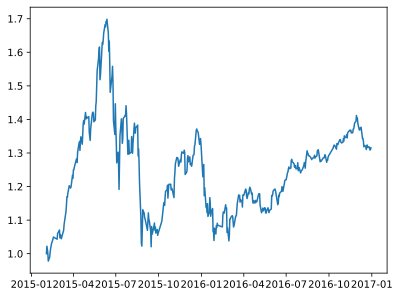

In [10]:
# get evaluating weight
weights_eval = get_weights(factor_VAE, features_eval, type="eval", repeat=5)
weights_eval.to_csv("../backtest/FactorVAE/eval/weights.csv")
# params for backtest
param = dict()
param["init_value"] = 1
param["start_date"] = "2015-01-01"
param["end_date"] = "2016-12-31" 
param["threshold"] = 1
param["days_back"] = 20
param["fee"] = True
param["stock_price"] = "../backtest/close.csv"  # close data
param["stock_weight"] = "../backtest/FactorVAE/eval/weights.csv" # weight of strategy
param["result_savepath"] = "../backtest/FactorVAE/eval/result.xlsx" # result save path
# backtest
backtest_result_eval = bt.backtest(param)

### 3. Testing backtest

Total step: 1195
Time span: 20
Stock size: 100
Feature size: 143


100%|██████████| 1195/1195 [02:16<00:00,  8.78it/s]


backtest from 2017-02-07 to 2017-02-08 has been done
backtest from 2017-02-08 to 2017-02-09 has been done
backtest from 2017-02-09 to 2017-02-10 has been done
backtest from 2017-02-10 to 2017-02-13 has been done
backtest from 2017-02-13 to 2017-02-14 has been done
backtest from 2017-02-14 to 2017-02-15 has been done
backtest from 2017-02-15 to 2017-02-16 has been done
backtest from 2017-02-16 to 2017-02-17 has been done
backtest from 2017-02-17 to 2017-02-20 has been done
backtest from 2017-02-20 to 2017-02-21 has been done
backtest from 2017-02-21 to 2017-02-22 has been done
backtest from 2017-02-22 to 2017-02-23 has been done
backtest from 2017-02-23 to 2017-02-24 has been done
backtest from 2017-02-24 to 2017-02-27 has been done
backtest from 2017-02-27 to 2017-02-28 has been done
backtest from 2017-02-28 to 2017-03-01 has been done
backtest from 2017-03-01 to 2017-03-02 has been done
backtest from 2017-03-02 to 2017-03-03 has been done
backtest from 2017-03-03 to 2017-03-06 has bee

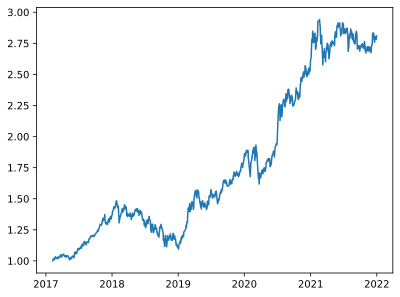

In [11]:
# get evaluating weight
weights_eval = get_weights(factor_VAE, features_test, type="test", repeat=5)
weights_eval.to_csv("../backtest/FactorVAE/test/weights.csv")
# params for backtest
param = dict()
param["init_value"] = 1
param["start_date"] = "2017-01-01"
param["end_date"] = "2021-12-31" 
param["threshold"] = 1
param["days_back"] = 20
param["fee"] = True
param["stock_price"] = "../backtest/close.csv"  # close data
param["stock_weight"] = "../backtest/FactorVAE/test/weights.csv" # weight of strategy
param["result_savepath"] = "../backtest/FactorVAE/test/result.xlsx" # result save path
# backtest
backtest_result_eval = bt.backtest(param)